# Image Processing with Python


## Opening an image in Python

In [15]:
import imageio

In [16]:
import os
import numpy as np
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

### This is how I import an image using numpy and PIL. Make sure you have navigated to the correct file folder.

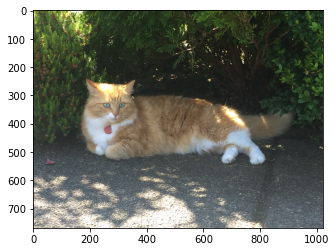

In [17]:
im=imageio.imread('data//test_images//11.jpeg')
type(im)
im.shape, im.dtype
plt.imshow(im)

In [18]:
im.shape

(768, 1024, 3)

In [20]:
imPIL=Image.open('data//test_images//11.jpeg')
imPIL.show()
np.array(imPIL).shape

(768, 1024, 3)

In [ ]:
im.shape

# Basics of Numpy/Scipy and PIL

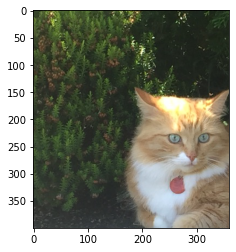

In [21]:
## Crop image
im_crop=im[100:500, 0:360]
plt.imshow(im_crop)

In [22]:
imPIL_crop=imPIL.crop((0,100,360,500))
imPIL_crop.show()

In [ ]:
## Rotate and flip an image

flipped_im=np.flipud(im)
plt.imshow(flipped_im)




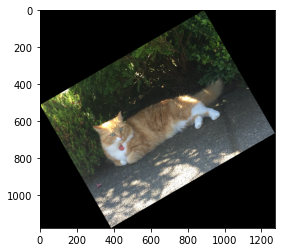

In [23]:
rotate_im=ndimage.rotate(im, 30)
plt.imshow(rotate_im)

In [24]:
rotate_imPIL=imPIL.rotate(30)
rotate_imPIL.show()

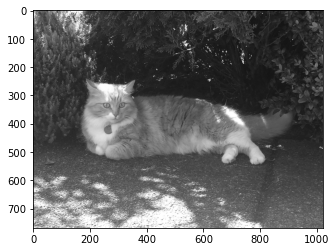

In [25]:
# Change to GreyScale
from skimage.color import rgb2gray
grayIm=rgb2gray(im)
plt.imshow(grayIm, 'gray')

In [26]:
grayImPIL=imPIL.convert('LA')
grayImPIL.show()

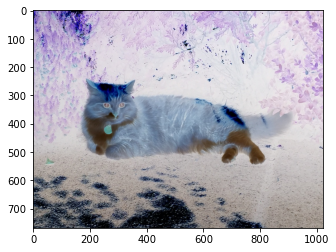

In [27]:
## Change contrast of Image
from skimage import util
inverted_im=util.invert(im)
plt.imshow(inverted_im)

In [28]:
from skimage import exposure
vmin, vmax = np.percentile(im, (0.2,99.8))
vmin, vmax

(7.0, 255.0)

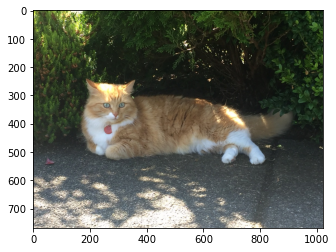

In [29]:
contrast_im=exposure.rescale_intensity(im, in_range=(vmin, vmax))
plt.imshow(contrast_im)

In [30]:
imPIL2=ImageEnhance.Contrast(imPIL)
#imPIL2.enhance(2).show()
imPIL2.enhance(2).show()

# Converting between np.array and PIL

In [32]:
Array2PIL=Image.fromarray(im)
Array2PIL.show()

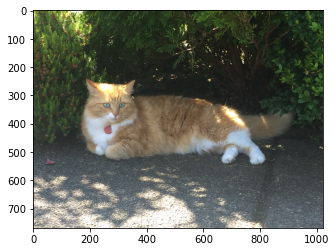

In [33]:
PIL2Array=np.array(imPIL)
plt.imshow(PIL2Array)

In [34]:
PIL2Array.shape

(768, 1024, 3)

# Manually Working with np.array 


In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import sys

In [36]:
pil_im=Image.open('data//test_images//11.jpeg')
pil_im.show()
imArray=np.array(pil_im)

In [37]:
arrayShape=imArray.shape
rows=arrayShape[0]
cols=arrayShape[1]
rows, cols

(768, 1024)

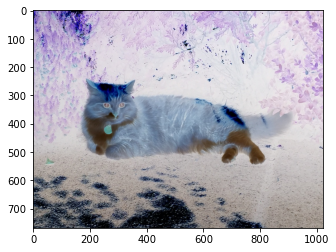

In [38]:
### Create a negative image
negIm=[]
negIm=255-imArray
plt.imshow(negIm)

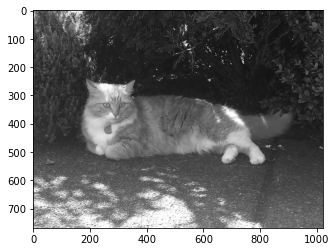

In [39]:
### Create a greyscale image
greyIm=0+imArray
for row in range(rows):
    for col in range(cols):
        grey=(float(imArray[row, col, 0]) + float(imArray[row, col, 1]) + float(imArray[row,col,2]))/3
        for color in range (3):
            gray=int(grey)
            greyIm[row][col][color]=grey
plt.imshow(greyIm)

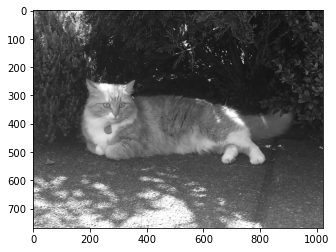

In [40]:
plt.imshow(greyIm[:,:,0], 'gray')

In [41]:
## Removing color
pil_im=Image.open('data//test_images//check_mark.jpg')
pil_im.show()
imArray=np.array(pil_im)


In [42]:
arrayShape=imArray.shape
rows=arrayShape[0]
cols=arrayShape[1]
rows, cols

(800, 700)

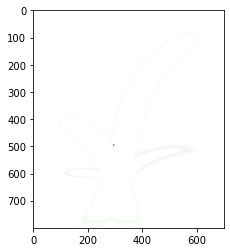

In [44]:
no_g=0+imArray

for row in range (rows):
    for col in range (cols):
        if imArray[row, col, 0]<240 and imArray[row, col, 1] >100 and imArray[row, col, 2] <250:
            for color in range(3):
                no_g[row][col][color]=255
plt.imshow(no_g)

# Creating a Gif or Movie from a Series of Images 

In [45]:
import glob
import moviepy.editor as mpy

In [46]:
imPIL=Image.open('data//test_images//669.jpg')
imPIL.show()
np.array(imPIL).shape

(500, 332, 3)

In [47]:
angle=0
while (angle<360):
    rotate_imPIL=imPIL.rotate(angle)
    fileNameTemplate=r'data\\test_images\\gif\\dog__{0:02d}.png'
    rotate_imPIL.save(fileNameTemplate.format(angle), format='png')
    angle=angle+10


In [48]:
    
gif_name='godog'
fps=50
file_list=glob.glob('data\\test_images\\gif\\*.png') # Get all the ongsin the current directory
list.sort(file_list, key=lambda x: int(x.split('__')[1].split('.png')[0])) # Sort images by #
clip=mpy.ImageSequenceClip(file_list, fps=fps) # Creates the image sequence
clip.write_gif('{}.gif'.format(gif_name), fps=fps) ## This will create the gif file

MoviePy - Building file godog.gif with imageio.


In [49]:
file_list

['data\\test_images\\gif\\dog__00.png',
 'data\\test_images\\gif\\dog__10.png',
 'data\\test_images\\gif\\dog__20.png',
 'data\\test_images\\gif\\dog__30.png',
 'data\\test_images\\gif\\dog__40.png',
 'data\\test_images\\gif\\dog__50.png',
 'data\\test_images\\gif\\dog__60.png',
 'data\\test_images\\gif\\dog__70.png',
 'data\\test_images\\gif\\dog__80.png',
 'data\\test_images\\gif\\dog__90.png',
 'data\\test_images\\gif\\dog__100.png',
 'data\\test_images\\gif\\dog__110.png',
 'data\\test_images\\gif\\dog__120.png',
 'data\\test_images\\gif\\dog__130.png',
 'data\\test_images\\gif\\dog__140.png',
 'data\\test_images\\gif\\dog__150.png',
 'data\\test_images\\gif\\dog__160.png',
 'data\\test_images\\gif\\dog__170.png',
 'data\\test_images\\gif\\dog__180.png',
 'data\\test_images\\gif\\dog__190.png',
 'data\\test_images\\gif\\dog__200.png',
 'data\\test_images\\gif\\dog__210.png',
 'data\\test_images\\gif\\dog__220.png',
 'data\\test_images\\gif\\dog__230.png',
 'data\\test_images\\gif\\

In [ ]:
test=file_list[0]
test

In [ ]:
test.split('_')[0]

# Denoising and Feature Extraction


In [50]:
from skimage.morphology import disk
from skimage import data, filters, restoration

In [51]:
coins=data.coins()

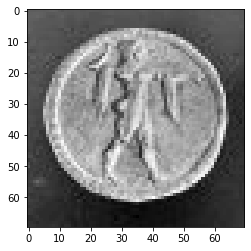

In [52]:
## Removing noise with filters
coins_zoom=coins[10:80, 300:370]
plt.imshow(coins_zoom, cmap='gray', interpolation='nearest')

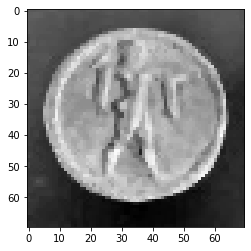

In [53]:
median_coins=filters.median(coins_zoom, disk(1))
plt.imshow(median_coins, cmap='gray', interpolation='nearest')

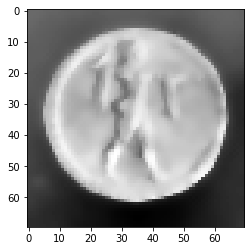

In [54]:
tv_coins=restoration.denoise_tv_chambolle(coins_zoom, weight=0.1)
plt.imshow(tv_coins, cmap='gray', interpolation='nearest')

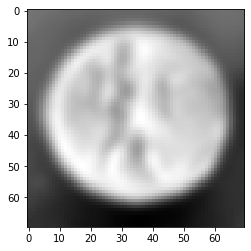

In [55]:
gaussian_coins=filters.gaussian(coins_zoom, sigma=2)
plt.imshow(gaussian_coins, cmap='gray', interpolation='nearest')

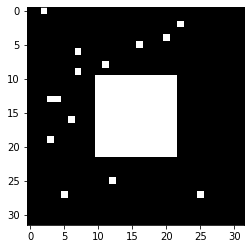

In [56]:
## Fixing mathematical morphology
square=np.zeros((32,32))
square[10:-10, 10:-10]=1
np.random.seed(2)
x,y=(32*np.random.random((2,20))).astype(np.int)
square[x,y]=1
plt.imshow(square, 'gray')

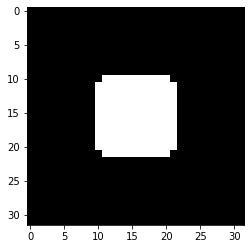

In [57]:
open_square=ndimage.binary_opening(square)
plt.imshow(open_square, 'gray')

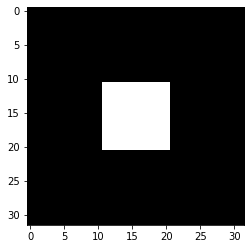

In [58]:
eroded_square=ndimage.binary_erosion(square)
plt.imshow(eroded_square, 'gray')

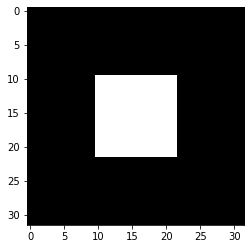

In [66]:
reconstruction=ndimage.binary_propagation(eroded_square, mask=square)
plt.imshow(reconstruction, 'gray')

Feature extraction: Counting "Red Blood Cells"
Using synthetic data

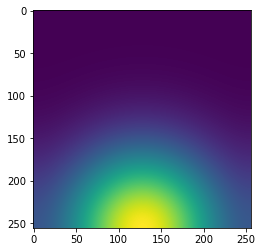

In [67]:
n=1
l=256
im=np.zeros((l,l))
points=l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)]=1
im=ndimage.gaussian_filter(im, sigma=l/(4.*n))
plt.imshow(im)

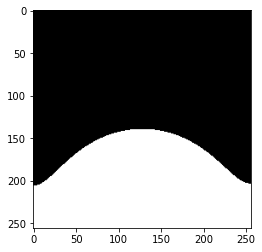

In [68]:
mask=im>im.mean()
plt.imshow(mask, cmap='gray')

In [69]:
label_im, nb_labels= ndimage.label(mask)
nb_labels


1

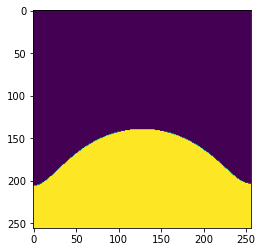

In [70]:
plt.imshow(label_im)

In [71]:
sizes=ndimage.sum(mask, label_im, range(nb_labels+1))
sizes

array([    0., 23364.])

In [72]:
mean_vals=ndimage.sum(im, label_im, range(1, nb_labels + 1))
mean_vals

array([0.86126059])

In [73]:
mask_size=sizes<1000
remove_pixel=mask_size[label_im]
remove_pixel.shape

(256, 256)

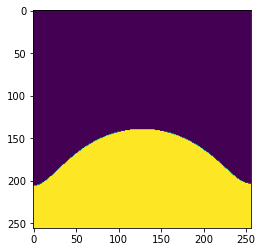

In [74]:
label_im[remove_pixel]=0
plt.imshow(label_im)

## CV2 Library

In [59]:
import cv2
from matplotlib import pyplot as plt

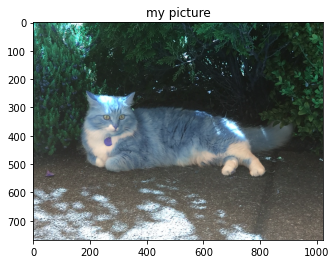

In [60]:
img=cv2.imread('data//test_images//11.jpeg')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img) ##BGR by default

#cv2.imshow('dog',a)
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, 'gray')
plt.title('my picture')
plt.show()
#cv2.waitKey()
#cv2.destroyAllWindows()


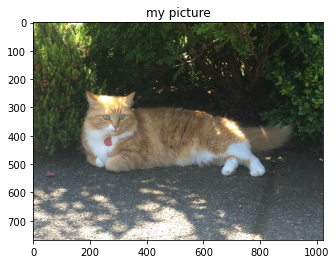

In [61]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#cv2.imshow('dog',a)
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(rgb)
plt.title('my picture')
plt.show()

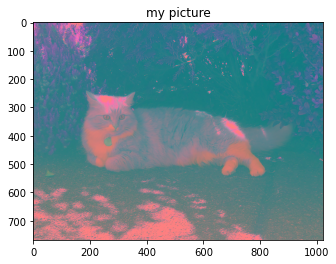

In [62]:
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.imshow(lab)
plt.title('my picture')
plt.show()

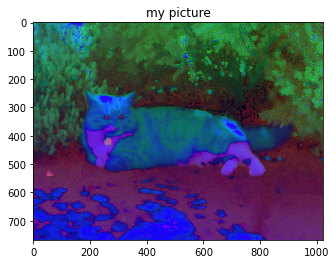

In [63]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.title('my picture')
plt.show()

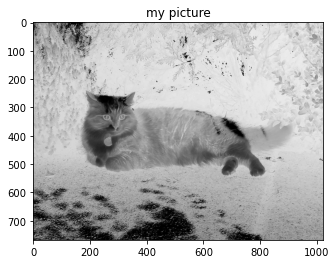

In [64]:
img=cv2.imread('data//test_images//11.jpeg',0)
img=cv2.bitwise_not(img)
plt.imshow(img, 'gray')
plt.title('my picture')
plt.show()

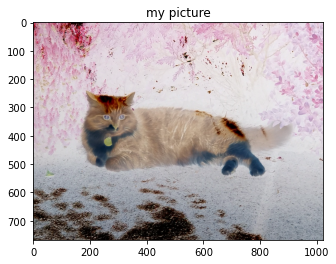

In [65]:
img=cv2.imread('data//test_images//11.jpeg',1)
img=cv2.bitwise_not(img)
plt.imshow(img)
plt.title('my picture')
plt.show()